In [20]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [21]:
torch.__version__

'2.9.0+cpu'

In [22]:
#create kbow parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
len(x), len(y)

(50, 50)

In [24]:
#Spliting data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [25]:
def plot_predictions(train_data=x_train,
                        train_labels=y_train,
                        test_data=x_test,
                        test_labels=y_test,
                        predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") 
    plt.legend(prop={"size": 14})
    plt.show()

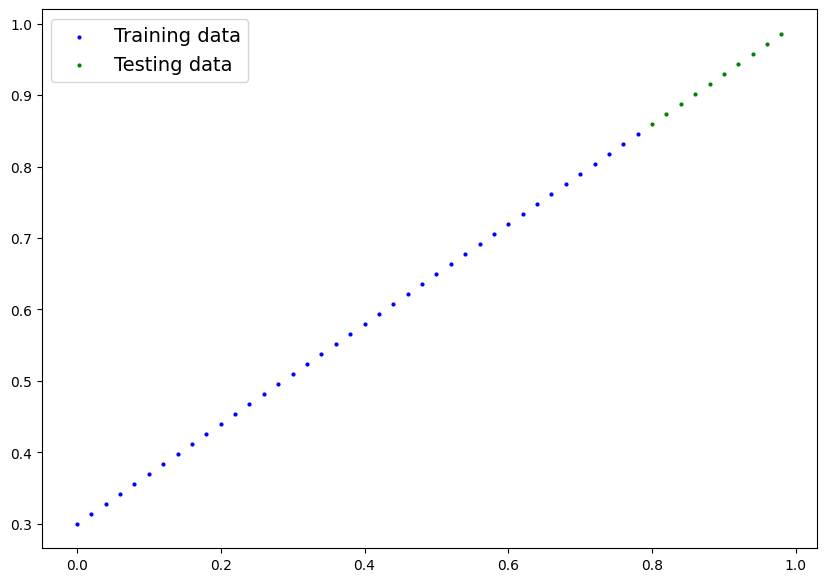

In [26]:
plot_predictions()

Pierwszy model

Co robi:
- zaczyna z przypadkowymi wartościami (weight i bias)
- patrzy na dane treningowe i dostosowuje wartości przypadkowe by w lepszy sposób reprezentować wartości idealne

Jak tego dokonuje:
Poprzez dwa algorytmy ->
- gradient descent - algorytm odpowiedizlany za znalezienie minimum funkcji błędu, czyli takich wag, które najlepiej dopasowują się do danych treningowych
- backpropagation - algorytm, który efektywnie oblicza pochodne błędu względem wszystkich wag przy użyciu reguły łańcuchowej z rachunku różniczkowego.


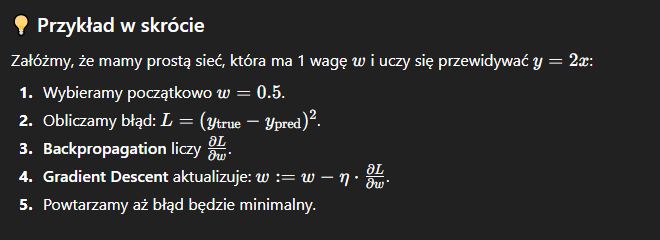

In [27]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias # linear regression formula

In [28]:
# create random seed
torch.manual_seed(42)  

model_0 = LinearRegressionModel()

#chceck out the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

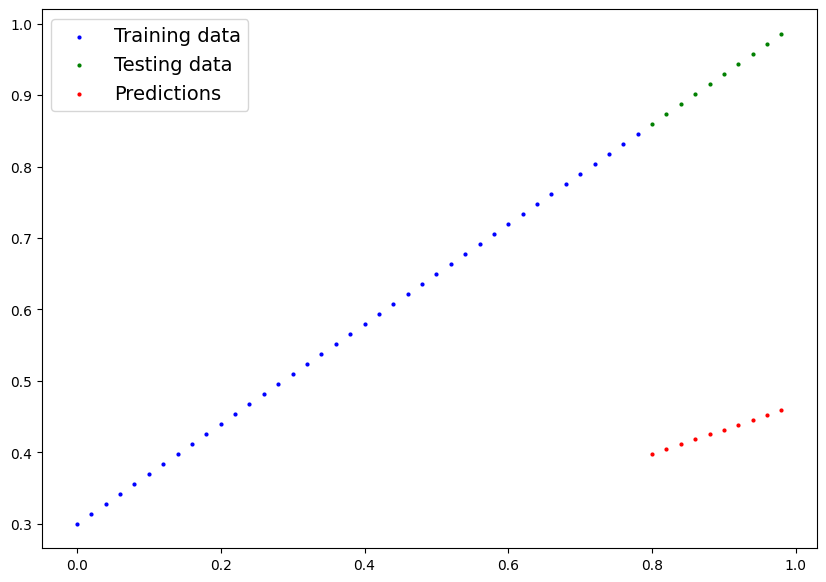

In [31]:
plot_predictions(predictions=y_preds)

Train Model

Założeniem uczenia maszyny jest przejście z parametrów nieznanych (mogą być losowe) do znanych.

Jedną z metod do obserwacji na ile model odbiega od perfekcji jest stosowanie "loss function".

Potrzebne do wytrenowania modelu:
- loss function
- optimizer